In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.linalg import expm
import math
from scipy.stats import multivariate_normal

In [2]:
#Question 3
#Part C:
def ParticleFilterPropagate(X_t, t_next, wheel_speed,r, w, var_1, var_2):
    X_t_new = []
    
    for pose in X_t:
        #pose = np.array(pose)
        V_l = wheel_speed[0] + np.random.normal(0,var_1)
        V_r = wheel_speed[1] + np.random.normal(0,var_2)

        omega = [[0,-(r/w)*(V_r - V_l), (r/2)*(V_r + V_l)],
                          [(r/w)*(V_r - V_l), 0, 0],
                          [0,0,0]]
        u_t = expm(t_next * np.array(omega))
        X_t_new.append(pose.dot(u_t))
    
    return np.array(X_t_new)



In [3]:
#Question 3
#Part D:
def ParticleFilterUpdate(prev_X, z, var_P):
    weights = []
    for x in prev_X:
        l_t = np.array([x[0][2],x[1][2]])
        error = z - l_t
        #gaussian of error
        w = multivariate_normal.pdf(error, mean = l_t, cov=var_P)
        weights.append(w)
    weights = np.array(weights)
    weights /= weights.sum()
    rand_indexes = np.random.default_rng().choice(a = prev_X,size = 1000, p=weights)

    return rand_indexes

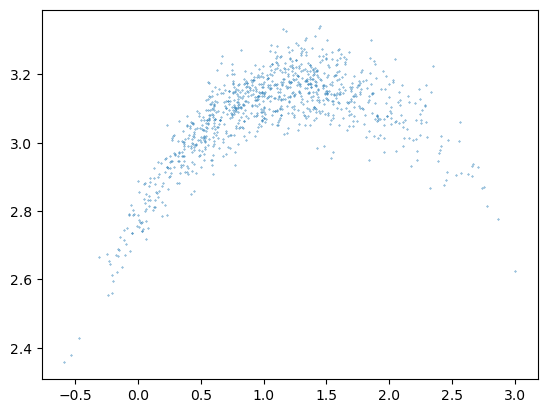

Mean:  [1.06132363 3.08025572]
Variance:  [0.37763963 0.01763996]


In [4]:
#part e 
X0 = np.eye(3)
X_t = []
for i in range(1000):
    X_t.append(X0)

currentTime = 0
wheel_speed = [1.5, 2]
t_next = 10
r = 0.25
w = 0.5
var_1 = 0.05
var_2 = 0.05
var_p = 0.10

X_10 = ParticleFilterPropagate(X_t, t_next, wheel_speed,r, w, var_1, var_2)

x1 = []
for x in X_10:
    x1.append([x[0][2],x[1][2]])

x1 = np.array(x1)
plt.scatter(x1[: ,0], x1[ :,1],s=0.1)
plt.show()

mean = np.mean(x1, axis = 0)
var = np.var(x1, axis = 0)

print("Mean: ", mean)
print("Variance: ", var)

Paritcle Set 1: 
Variance: [0.01924719 0.01626943] 
Mean: [1.65421938 1.19064288]
Paritcle Set 2: 
Variance: [0.24784469 0.01472948] 
Mean: [1.06046081 3.10956657]
Paritcle Set 3: 
Variance: [0.27546312 0.32162802] 
Mean: [-0.91644902  3.15329977]
Paritcle Set 4: 
Variance: [0.22758894 0.56073142] 
Mean: [-1.5687772   1.31425832]


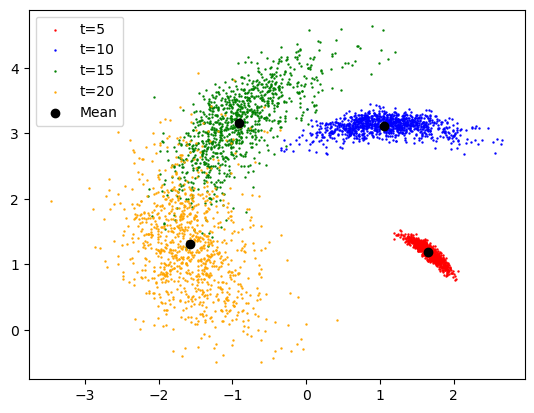

In [5]:
#Part f
X_5 =  ParticleFilterPropagate(X_t, 5, wheel_speed,r, w, var_1, var_2)
X_10 = ParticleFilterPropagate(X_5, 5, wheel_speed,r, w, var_1, var_2)
X_15 = ParticleFilterPropagate(X_10, 5, wheel_speed,r, w, var_1, var_2)
X_20 = ParticleFilterPropagate(X_15, 5, wheel_speed,r, w, var_1, var_2)

l1 = []
l2 = []
l3 = []
l4 = []

for x in X_5:
    l1.append([x[0][2],x[1][2]])
for x in X_10:
    l2.append([x[0][2],x[1][2]])
for x in X_15:
    l3.append([x[0][2],x[1][2]])
for x in X_20:
    l4.append([x[0][2],x[1][2]])

l1 = np.array(l1)
l2 = np.array(l2)
l3 = np.array(l3)
l4 = np.array(l4)

mean1 = np.mean(l1, axis = 0)
mean2 = np.mean(l2, axis = 0)
mean3 = np.mean(l3, axis = 0)
mean4 = np.mean(l4, axis = 0)

var1 = np.var(l1, axis = 0)
var2 = np.var(l2, axis = 0)
var3 = np.var(l3, axis = 0)
var4 = np.var(l4, axis = 0)

fig = plt.figure()
ax =fig.add_subplot(111)
ax.scatter(l1[:,0],l1[:,1],s=0.5,c='red')
ax.scatter(l2[:,0],l2[:,1],s=0.5,c='blue')
ax.scatter(l3[:,0],l3[:,1],s=0.5,c='green')
ax.scatter(l4[:,0],l4[:,1],s=0.5,c='orange')

ax.scatter(mean1[0],mean1[1],c='black')
ax.scatter(mean2[0],mean2[1],c='black')
ax.scatter(mean3[0],mean3[1],c='black')
ax.scatter(mean4[0],mean4[1],c='black')

ax.legend(['t=5','t=10','t=15','t=20',"Mean"])

print("Paritcle Set 1: \nVariance:", var1, "\nMean:", mean1)
print("Paritcle Set 2: \nVariance:", var2, "\nMean:", mean2)
print("Paritcle Set 3: \nVariance:", var3, "\nMean:", mean3)
print("Paritcle Set 4: \nVariance:", var4, "\nMean:", mean4)

Paritcle Set 1: 
Variance: [0.02135077 0.01630815] 
Mean: [1.6491773  1.19406709]
Paritcle Set 2: 
Variance: [0.02785678 0.03172795] 
Mean: [-0.42216253  2.77817893]
Paritcle Set 3: 
Variance: [0.0372086  0.01318813] 
Mean: [-1.60384095  0.45802981]
Paritcle Set 4: 
Variance: [0.05157772 0.08407549] 
Mean: [ 0.71697998 -0.37485072]


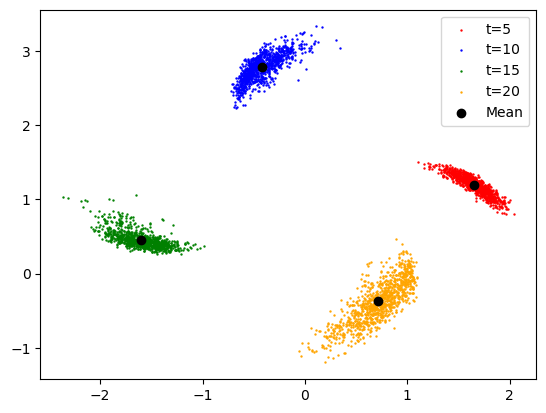

In [6]:
#part g
z5 =  [1.6561, 1.2847]
z10 = [1.0505, 3.1059]
z15 = [-0.9875,3.2118]
z20 = [-1.6450,1.1978]

X0 = np.eye(3)
X_t = []
for i in range(1000):
    X_t.append(X0)

x0_post = ParticleFilterUpdate(X_t, z5, var_p)
X_5 = ParticleFilterPropagate(x0_post, 5, wheel_speed, r, w, var_1, var_2)
x5_post = ParticleFilterUpdate(X_5, z10, var_p)

X_10 = ParticleFilterPropagate(x5_post, 5, wheel_speed,r, w, var_1, var_2)
x10_post = ParticleFilterUpdate(X_10, z15, var_p)

X_15 = ParticleFilterPropagate(x10_post, 5, wheel_speed,r, w, var_1, var_2)
x15_post = ParticleFilterUpdate(X_15, z20, var_p)

X_20 = ParticleFilterPropagate(x15_post, 5, wheel_speed,r, w, var_1, var_2)

l1 = []
l2 = []
l3 = []
l4 = []

for x in X_5:
    l1.append([x[0][2],x[1][2]])
for x in X_10:
    l2.append([x[0][2],x[1][2]])
for x in X_15:
    l3.append([x[0][2],x[1][2]])
for x in X_20:
    l4.append([x[0][2],x[1][2]])

l1 = np.array(l1)
l2 = np.array(l2)
l3 = np.array(l3)
l4 = np.array(l4)

mean1 = np.mean(l1, axis = 0)
mean2 = np.mean(l2, axis = 0)
mean3 = np.mean(l3, axis = 0)
mean4 = np.mean(l4, axis = 0)

var1 = np.var(l1, axis = 0)
var2 = np.var(l2, axis = 0)
var3 = np.var(l3, axis = 0)
var4 = np.var(l4, axis = 0)

fig1 = plt.figure()
ax =fig1.add_subplot(111)
ax.scatter(l1[:,0],l1[:,1],s=0.5,c='red')
ax.scatter(l2[:,0],l2[:,1],s=0.5,c='blue')
ax.scatter(l3[:,0],l3[:,1],s=0.5,c='green')
ax.scatter(l4[:,0],l4[:,1],s=0.5,c='orange')

ax.scatter(mean1[0],mean1[1],c='black')
ax.scatter(mean2[0],mean2[1],c='black')
ax.scatter(mean3[0],mean3[1],c='black')
ax.scatter(mean4[0],mean4[1],c='black')

ax.legend(['t=5','t=10','t=15','t=20',"Mean"])

print("Paritcle Set 1: \nVariance:", var1, "\nMean:", mean1)
print("Paritcle Set 2: \nVariance:", var2, "\nMean:", mean2)
print("Paritcle Set 3: \nVariance:", var3, "\nMean:", mean3)
print("Paritcle Set 4: \nVariance:", var4, "\nMean:", mean4)
